# 
**Capstone Project**

# **Problem Statement:**

Banana cultivation faces significant challenges due to various leaf spot diseases that severely impact yield and quality. These diseases - Sigatoka, Cordana, and Pestalotiopsis - cause growth inhibition, reduced fruit production, and potential plant death, leading to financial losses for growers and disruptions in the global banana supply. The task is to develop an effective machine learning model to identify and classify these diseases from images of banana leaves, enabling timely and accurate diagnosis to reduce their impact.

# **Aim of the Project:**

The aim of this project is to create a robust classification model for diagnosing banana leaf spot diseases using a diverse dataset of images. The dataset includes images of banana leaves affected by Sigatoka, Cordana, and Pestalotiopsis, as well as healthy leaves. The goal is to accurately classify the images into their respective disease categories, enhancing the ability to monitor and manage banana plant health and reduce the adverse effects of these diseases on banana production.

# **Benefits of the Solution:**

1. Enhanced Disease Detection: An accurate classification model will facilitate the early detection and diagnosis of banana leaf spot diseases, allowing for timely intervention and treatment to protect plant health and yield.

2. Informed Decision-Making for Growers: By providing reliable disease classification, the model will help banana growers make informed decisions regarding disease management practices, potentially reducing crop losses and financial setbacks.





In [6]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from pathlib import Path
import random

import warnings

warnings.simplefilter("ignore", category=Warning)

In [7]:
#Set seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
data_root_path = Path(r'C:\Users\USER\Desktop\project\BANANA PROJECT\BananaLSD')
all_classes = os.listdir(data_root_path)
print(all_classes)

['cordana', 'healthy', 'pestalotiopsis', 'sigatoka']


In [9]:
#Load images and labels
def load_data(data_path):
  images = []
  labels = []
  for label, category in enumerate(all_classes):
    category_path = Path(data_path) / category
    for image_path in category_path.glob("*.jpeg"):
      img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
      img_array = tf.keras.preprocessing.image.img_to_array(img)
      images.append(img_array)
      labels.append(label)
  return np.array(images), np.array(labels)

In [10]:
X, y = load_data(data_root_path)
print(f'Total images: {len(X)}, Total labels: {len(y)}')

Total images: 937, Total labels: 937


In [11]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
#Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0

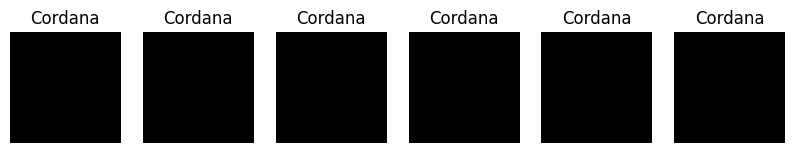

In [28]:
#Identify the class label for Cordana
cord_label = 0

#Filter images belonging to the Cordana class
cord_images = np.where(y_train == cord_label)

#Visualization
plt.figure(figsize=(10, 10))
for i in range(6):
  ax = plt.subplot(1, 6, i + 1)
  plt.imshow(X_train[cord_images[0][i]])
  plt.title("Cordana")
  plt.axis("off")

plt.show()

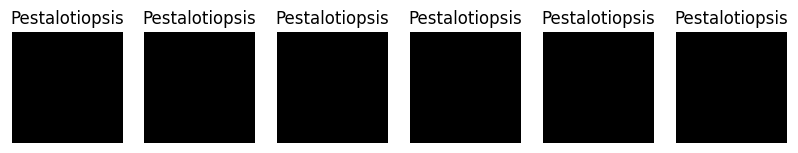

In [16]:
#Identify the class label for Pestalotiopsis
pest_label = 1

#Filter images belonging to the Pestalotis class
pest_images = np.where(y_train == pest_label)

#Visualization
plt.figure(figsize=(10, 10))
for i in range(6):
  ax = plt.subplot(1, 6, i + 1)
  plt.imshow(X_train[pest_images[0][i]])
  plt.title("Pestalotiopsis")
  plt.axis("off")

plt.show()

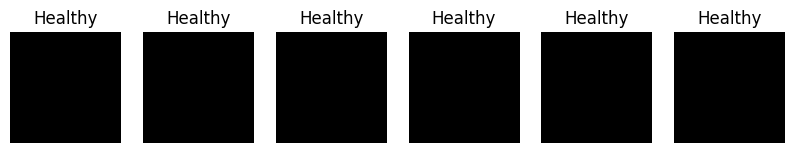

In [17]:
#Identify the class label for Healthy
healthy_label = 2

#Filter images belonging to the Healthy
healthy_images = np.where(y_train == healthy_label)

#Visualization
plt.figure(figsize=(10, 10))
for i in range(6):
  ax = plt.subplot(1, 6, i + 1)
  plt.imshow(X_train[healthy_images[0][i]])
  plt.title("Healthy")
  plt.axis("off")

plt.show()

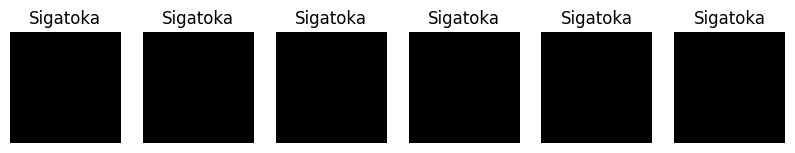

In [18]:
#Identify the class label for Sigatoka
sig_label = 3

#Filter images belonging to the Sigatoka class
sig_images = np.where(y_train == sig_label)

#Visualization
plt.figure(figsize=(10, 10))
for i in range(6):
  ax = plt.subplot(1, 6, i + 1)
  plt.imshow(X_train[sig_images[0][i]])
  plt.title("Sigatoka")
  plt.axis("off")

plt.show()

In [30]:
#Use LabelEncoder to encode Labels
one_hot_encoder = OneHotEncoder(sparse_output=True)
y_train_encoded = one_hot_encoder.fit_transform(y_train.reshape(-1, 1))
y_test_encoded = one_hot_encoder.transform(y_test.reshape(-1, 1))

In [33]:
#Define the CNN Model
model = Sequential([
    layers.Conv2D(64, (1, 1), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (1, 1), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(4, activation='softmax')
])

In [34]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [35]:
#Fit the model
history = model.fit(X_train, y_train_encoded,
                    epochs=14,
                    validation_data=(X_test, y_test_encoded),
                    verbose = 1)

Epoch 1/14


TypeError: Failed to convert elements of SparseTensor(indices=Tensor("data_1:0", shape=(None, 2), dtype=int64), values=Tensor("data_2:0", shape=(None,), dtype=float32), dense_shape=Tensor("data_3:0", shape=(2,), dtype=int64)) to Tensor. Consider casting elements to a supported type. See https://www.tensorflow.org/api_docs/python/tf/dtypes for supported TF dtypes.

In [22]:
##EValuate the model
loss, accuracy = model.evaluate(X_test, y_test_encoded)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

6/6 [==============================] - 5s 682ms/step - loss: 0.4385 - accuracy: 0.8245
Test Accuracy: 82.45%


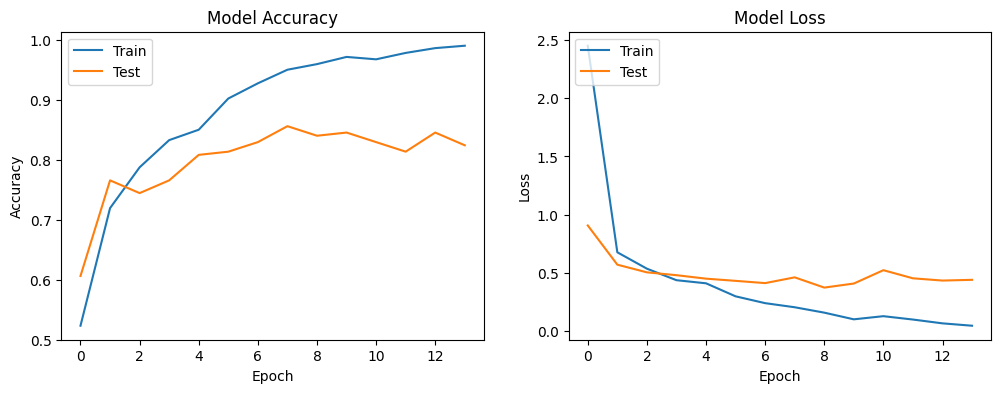

In [23]:
#Plot training & validation accuracy and loss values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

6/6 [==============================] - 8s 1s/step


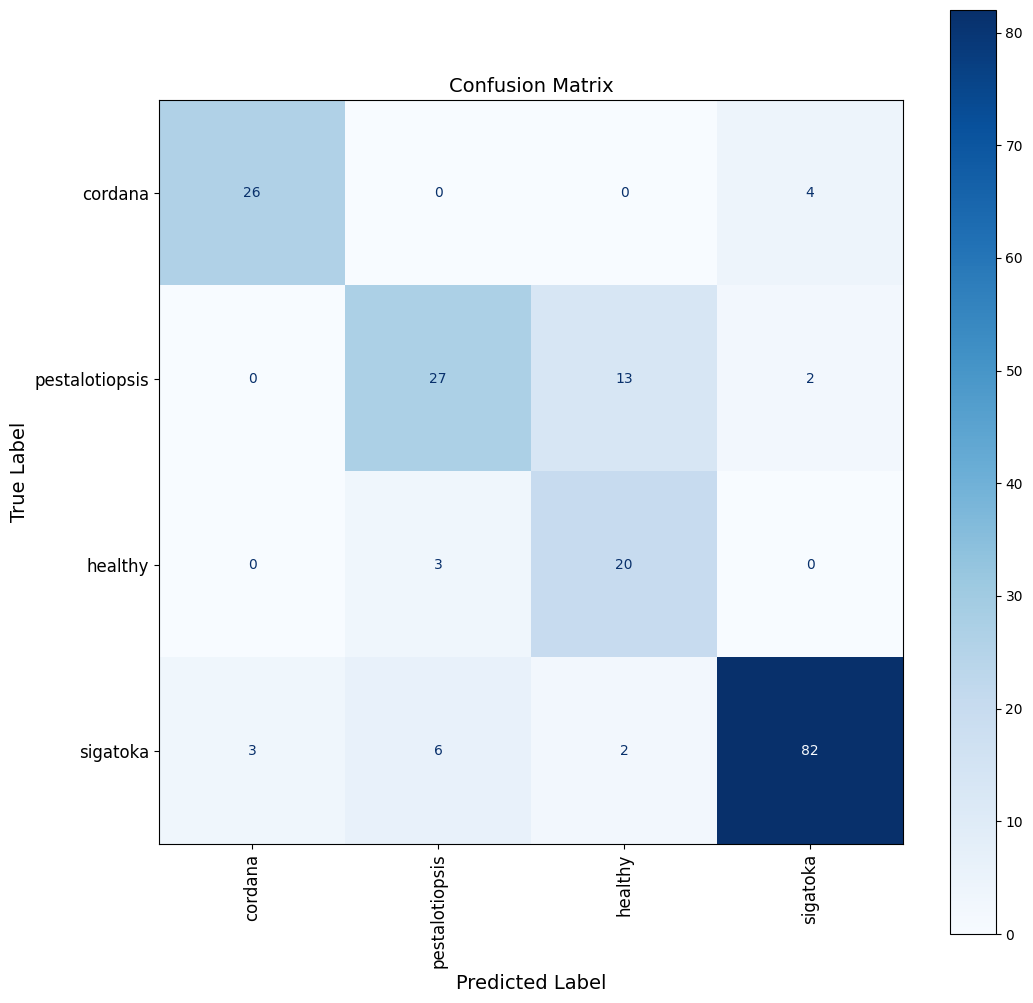

In [26]:
#Predicting on test data
y_pred_encoded = model.predict(X_test)
y_pred = np.argmax(y_pred_encoded, axis=1)

#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=all_classes)

#The plot size
plt.figure(figsize=(12, 12))
disp.plot(cmap=plt.cm.Blues, ax=plt.gca(), xticks_rotation='vertical')

#Font sizes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.title('Confusion Matrix', fontsize=14)

plt.show()

In [27]:
#Saving the model
model.save('banana_disease_model.h5')